  **1.- Transformando a magnitudes V e I**

---

Para transformar de las magnitudes en distinto sistemas y filtros usamos las siguientes transformaciones:

$TransMAG = OrigiMAG + c_{0} + c_{1} TransColor + c_{1} TransColor²$

Donde *TransMAG* es la magnitud en el sistema transformado, *OrigiMAG* es la magnitud en el sistema original

Como queremos transformar del sistema VEGAMAG de los filtros f555w y f814w a las magnitudes V e I, tenemos:

$V = f555w + 25.250 - 0.090(V-I) + 0.034(V-I)²$
      $(1)$

$I = f814w + 24.837 - 0.060(V-I) - 0.099(V-I)²$
      $(2)$

Pero usando el método señalado en la fuente de abajo calculamos V e I primero con:

$V = f555w + 25.250 - 0.090(f555w-f814w) + 0.034(f555w-f814w)²$

$I = f814w + 24.837 - 0.060(f555w-f814w) - 0.099(f555w-f814w)²$

Con esos valores de V e I los reemplazamos en $(1)$ y $(2)$ y luego de iterar 5 veces obtenemos V e I finales.

El código de encontrar V e I está despues de hacer el match de los catálogos. Se usaron los archivos .cat generados en la tarea anterior.

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np

catalogos = []
coordenadas = []

f555w = ascii.read('f555w_NRI.cat')
catalogos.append(f555w)
coordenadas.append(SkyCoord(ra=f555w['ALPHA_J2000'],dec=f555w['DELTA_J2000'],unit='deg'))

f814w = ascii.read('f814w_NRI.cat')
catalogos.append(f814w)
coordenadas.append(SkyCoord(ra=f814w['ALPHA_J2000'],dec=f814w['DELTA_J2000'],unit='deg'))

idx, sep2d, dist3d = SkyCoord.match_to_catalog_sky(coordenadas[0],coordenadas[1])
union = list(zip(range(0, len(idx)), idx, sep2d))

par1, par2, par3 = zip(*union)
catalogos[0] = catalogos[0][list(par1)]
catalogos[1] = catalogos[1][list(par2)]

Lf555w = list(map(lambda x: x-25, catalogos[0]['MAG_APER']))
Lf814w = list(map(lambda x: x-25, catalogos[1]['MAG_APER']))

V = list(map(lambda x: x[0]+25.25-0.09*(x[0]-x[1])+0.034*(x[0]-x[1])*(x[0]-x[1]),zip(Lf555w,Lf814w)))
I = list(map(lambda x: x[1]+24.84-0.06*(x[0]-x[1])-0.099*(x[0]-x[1])*(x[0]-x[1]),zip(Lf555w,Lf814w)))

for i in range(1, 5):
    V = list(map(lambda x: x[2]+25.25-0.09*(x[0]-x[1])+0.034*(x[0]-x[1])*(x[0]-x[1]),zip(V,I,Lf555w)))
    I = list(map(lambda x: x[2]+24.84-0.06*(x[0]-x[1])-0.099*(x[0]-x[1])*(x[0]-x[1]),zip(V,I,Lf814w)))

ejex = list(map(lambda x: x[0]-x[1],zip(V,I)))
ejey = list(map(lambda x: x,V))

plt.scatter(ejex,ejey,marker='o',c='Black',s=1)
plt.xlim(-1,3)
plt.ylim(16,27)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Fuentes:
> *http://iopscience.iop.org/article/10.1086/444553/pdf*

  **2.- Isocronas para NGC 121**

---

Para encontrar la isócronas instalamos el módulo Isochrones.

Con Isochrones buscamos 

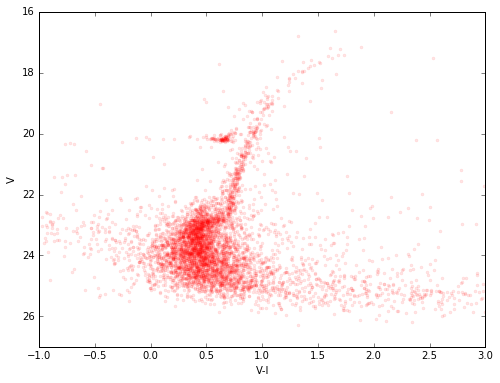

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(figsize=(8,6))
axis.plot(ejex,ejey,'r.',alpha=0.1)
plt.xlim(-1,3)
plt.ylim(16,27)
plt.gca().invert_yaxis()
axis.set_xlabel('V-I')
axis.set_ylabel('V')
plt.show()

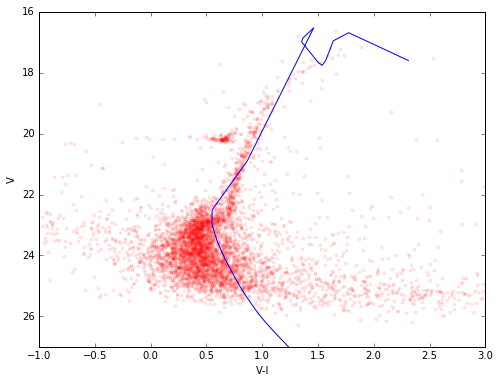

In [3]:
from isochrones.dartmouth import Dartmouth_Isochrone

iso = Dartmouth_Isochrone(bands=['V','I'])
model = iso.isochrone(10, -1.5, distance=61000, AV=0.101)

model_V = model.V_mag
model_I = model.I_mag
model_VI = model_V - model_I
fig, axis = plt.subplots(figsize=(8,6))

axis.plot(ejex,ejey,'r.',alpha=0.1)
plt.xlim(-1,3)
plt.ylim(16,27)
plt.gca().invert_yaxis()
axis.set_xlabel('V-I')
axis.set_ylabel('V')

axis.plot(model_VI,model_V)
plt.show()

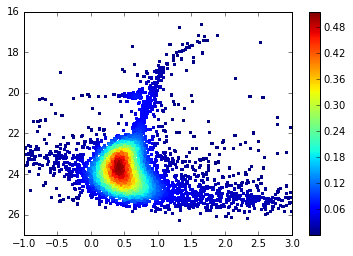

In [8]:
from scipy.stats import gaussian_kde
import numpy as np



ejes = list(zip(ejex, ejey))
ejes = list(filter(lambda x: x[0] > -1 and x[0] < 3 and x[1] >16 and x[1]<27, ejes))
ejex, ejey = zip(*ejes)

VI = np.vstack([ejex, ejey])
z = gaussian_kde(VI)(VI)

fig, ax = plt.subplots()
graf = ax.scatter(ejex, ejey, c=z, s=10, marker='s', edgecolor='')
fig.colorbar(graf)
plt.xlim(-1,3)
plt.ylim(16,27)
plt.gca().invert_yaxis()
axis.set_xlabel('V-I')
axis.set_ylabel('V')

plt.show()